# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p>
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shawn Kalish

EID: smk3874

Name: Jackson Hassell

EID: jbh3227

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

# ANSWER:

To understand Gradient Boosting, one must first understand Adaboost. Adaboost combines a lot of "weak learners" in an effort to make better classifications. The weak learners are usually stumps, and some of those stumps get more say in the classification than others. Each new stump is built upon the previous stump's mistakes.

In contrast, Gradient Boost starts by making a single leaf, rather than a whole tree or a stump. This leaf represents an initial guess for an attribute value of all of the samples. When trying to predict a continuous value like height, the first guess is the average of all the values of that particular feature. GB then builds a tree based on the residuals of that guess. 
Then another tree is added based on the new residuals, and we keep adding tress based on the errors made by the previous tree.
Like Adaboost, this tree is based on the errors made by the previous tree. Unlike Adaboost however, this tree is usually larger than a stump, and GB scales all the trees by the same amount.       

The major difference between Gradient Boosting and Adaboost is how the two algorithms identify weak learners.

# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC # Added this

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel): # Changed this to accept kernel value specified in plot_model()
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()

# ANSWERS:

### a) Implement train_model()

In [3]:
# Changed the code a bit here, wanted to define the function only once
def train_model(X, y, kernel, C, gamma):
    # Implement me!!  
    svc = SVC(kernel=kernel, C=C, gamma=gamma)
    svc.fit(X, y)
    return svc

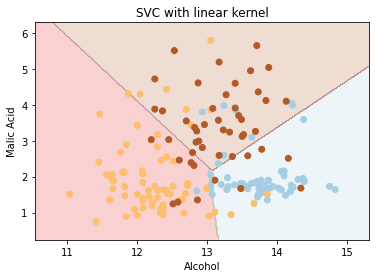

In [4]:
svc = train_model(X, y, 'linear', 1, 0.5)
plot_model(X, y, svc, 'linear')

### b) radial basis function kernel

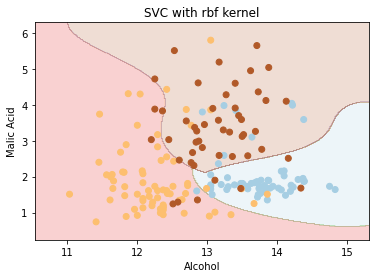

In [5]:
svc = train_model(X, y, 'rbf', 1, 0.5)
plot_model(X, y, svc, 'rbf')

### What do you observe?

The rbf kernel will give the model the ability to better understand more complex relationships. This particular example doesn't necassarily drive this point home because there are still quite a few misclassifed samples, but overall a non-linear kernel can model many more functions within its function space.

Another observation here is that the kernel needs a little help with a slightly higher gamma value!

### c) gamma values 1, 10, 100 (Already did 0.5 in (b))

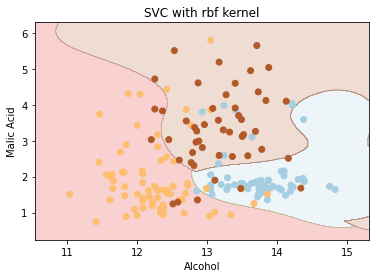

In [6]:
# gamma = 1
svc = train_model(X, y, 'rbf', 1, 1)
plot_model(X, y, svc, 'rbf')

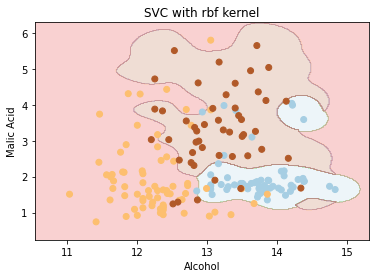

In [7]:
# gamma = 10
svc = train_model(X, y, 'rbf', 1, 10)
plot_model(X, y, svc, 'rbf')

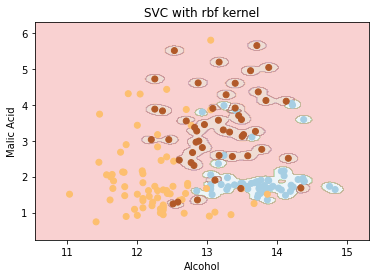

In [8]:
# gamma = 100
svc = train_model(X, y, 'rbf', 1, 100)
plot_model(X, y, svc, 'rbf')

### What do you observe from the plot as gamma increases?

We can see that as gamma increases, the accuracy increases.. but so does bias! The gamma parameter defines how far the influence of a single training example reaches. This means that high gamma values will consider only points close to the plausible hyperplane and low gamma values will consider points at greater distances.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression as LRC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import BaggingClassifier as BC, RandomForestClassifier as RFC, GradientBoostingClassifier as GBC, AdaBoostClassifier as ABC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn import tree # Added this for the plot in case visualization is needed

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


# ANSWERS:

### a)
Fit a Decision Tree Classifier with random_state=10, and a Logistic Regression Classifier with random_state=10 and solver="newton-cg" for the spam classification problem. For each classifier, report the accuracy_score and roc_auc_score on the test data. Note: Before computing roc_auc_score, you will need predict_proba(X_test)[:, 1] to obtain the predicted target scores first.

In [10]:
# Decision Tree Classifier
spamDT = DTC(random_state = 10).fit(X_train, y_train)

# Accuracy
y_pred  = spamDT.predict(X_test)
print("accuracy_score of DT Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamDT.predict_proba(X_test)[:, 1]
print("roc_auc_score of DT Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of DT Classifier: 0.9098090849242922
roc_auc_score of DT Classifier 0.9040453749567611


In [11]:
# Visualize the Tree

#feature_names = data.columns
#fig, ax = plt.subplots(figsize=(20, 20), facecolor='gray')
#tree.plot_tree(spamTree,feature_names=feature_names,filled=True,rounded=True);

In [12]:
# Logistic Regression Classifier
spamLR = LRC(random_state=10, solver='newton-cg').fit(X_train, y_train) 

# Accuracy
y_pred  = spamLR.predict(X_test)
print("accuracy_score of LR Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamLR.predict_proba(X_test)[:, 1]
print("roc_auc_score of LR Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of LR Classifier: 0.9315339038841343
roc_auc_score of LR Classifier 0.9734682742610166


### b)
For each classifier in (a), use Bagging to create an ensemble of 50 classifiers (i.e n_estimators=50) with random_state=10, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.

In [13]:
# Bagging w/ DT as base
spamBagg_DT = BC(base_estimator=spamDT, n_estimators=50, random_state=10).fit(X_train, y_train)

# Bagging w/ LR as base
spamBagg_LR = BC(base_estimator=spamLR, n_estimators=50, random_state=10).fit(X_train, y_train)

In [14]:
# Metrics: Bagging w/ DT as base

# Accuracy
y_pred  = spamBagg_DT.predict(X_test)
print("accuracy_score of Bagging w/ DT Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamBagg_DT.predict_proba(X_test)[:, 1]
print("roc_auc_score of Bagging w/ DT Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of Bagging w/ DT Classifier: 0.9368005266622779
roc_auc_score of Bagging w/ DT Classifier 0.9796839729119637


In [15]:
# Metrics: Bagging w/ LR as base

# Accuracy
y_pred  = spamBagg_LR.predict(X_test)
print("accuracy_score of Bagging w/ LR Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamBagg_LR.predict_proba(X_test)[:, 1]
print("roc_auc_score of Bagging w/ LR Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of Bagging w/ LR Classifier: 0.934167215273206
roc_auc_score of Bagging w/ LR Classifier 0.97552769248874


### Briefly describe the impact of Bagging on both classifiers:

Bagging did a good job of improving the metrics of the Decision Tree Classifier, but it only very slightly improved the metrics
of the Logistics Regression Classifier. Bagging is a good way to avoid overfitting as a single decision tree can overfit to the point where each leaf is a point of the dataset, but LR is not very prone to overfitting so the gains are not going to be much in comparison.

### c)
Fit a Random Forest Classifier for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters from {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}. As what you did in (a), report the accuracy_score and roc_auc_score on the test data.

In [16]:
# Fit a default RF Classifier to be used for GridSearchCV
spamRF = RFC().fit(X_train, y_train)

In [17]:
# Create the parameter grid based on instructions for RF
param_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
    }
grid_search = GridSearchCV(estimator = spamRF, param_grid = param_grid,    ### estimator = spamRF!
                          cv = 3, n_jobs = -1, verbose = 2)

In [18]:
# Instantiate the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100, 500], 'random_state': [42]},
             verbose=2)

In [19]:
# Display best parameters
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 500, 'random_state': 42}

In [20]:
# Now fit with the best parameters found above
spamRF = RFC(n_estimators=500, criterion='entropy', random_state=42).fit(X_train, y_train)

In [21]:
# Accuracy
y_pred  = spamRF.predict(X_test)
print("accuracy_score of RF Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamRF.predict_proba(X_test)[:, 1]
print("roc_auc_score of RF Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of RF Classifier: 0.9578670177748518
roc_auc_score of RF Classifier 0.9900746739700235


### d)
Fit a GradientBoosting Classifier, and an AdaBoost Classifier for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier:

---For GradientBoosting, find the best combination from {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]};

---For AdaBoost, find the best combination from {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}.

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

## GradientBoosting

In [22]:
# Fit a default GB Classifier to be used for GridSearchCV
spamGB = GBC().fit(X_train, y_train)

In [23]:
# Create the parameter grid based on instructions for GB
param_grid = {
    'n_estimators': [10, 100, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 10],
    'subsample' : [0.5, 0.7, 1.0],
    'random_state': [42]
    }
grid_search = GridSearchCV(estimator = spamGB, param_grid = param_grid,    ### estimator = spamGB!
                          cv = 3, n_jobs = -1, verbose = 2)

In [24]:
# Instantiate the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [10, 100, 500], 'random_state': [42],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [25]:
# Display best parameters
grid_search.best_params_

{'learning_rate': 0.5,
 'max_depth': 10,
 'n_estimators': 100,
 'random_state': 42,
 'subsample': 1.0}

In [26]:
# Now fit with the best parameters found above
spamGB = GBC(n_estimators=100, learning_rate=0.5, max_depth=10, 
                                    subsample=1.0, random_state=42).fit(X_train, y_train)

In [27]:
# Accuracy
y_pred  = spamGB.predict(X_test)
print("accuracy_score of GB Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamGB.predict_proba(X_test)[:, 1]
print("roc_auc_score of GB Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of GB Classifier: 0.9552337063857801
roc_auc_score of GB Classifier 0.9861332505999949


## AdaBoost

In [28]:
# Fit a default AB Classifier to be used for GridSearchCV
spamAB = ABC().fit(X_train, y_train)

In [29]:
# Create the parameter grid based on instructions for AB
param_grid = {
    'n_estimators': [10, 100, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'random_state': [42]
}
grid_search = GridSearchCV(estimator = spamAB, param_grid = param_grid,     ### estimator = spamAB!
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
# Instantiate the grid search model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [10, 100, 500], 'random_state': [42]},
             verbose=2)

In [31]:
# Display best parameters
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 500, 'random_state': 42}

In [32]:
# Now fit with the best parameters found above
spamAB = ABC(n_estimators=500, learning_rate=0.1, random_state=42).fit(X_train, y_train)

In [33]:
# Accuracy
y_pred  = spamAB.predict(X_test)
print("accuracy_score of AB Classifier:", accuracy_score(y_test, y_pred))

# ROC_AUC_Score
y_prob = spamAB.predict_proba(X_test)[:, 1]
print("roc_auc_score of AB Classifier", roc_auc_score(y_test, y_prob))

accuracy_score of AB Classifier: 0.9512837393021725
roc_auc_score of AB Classifier 0.9858836241481498


### e)
In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier.

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the accuracy_scores of the three classifiers vs n_estimators= [10, 100, 500] in one plot, and plot the roc_auc_scores of the three classifiers vs n_estimators= [10, 100, 500] in another plot. That is, keep all other hyperparameters (except for n_estimators) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (n_estimators).

In [34]:
ne = [10, 100, 500]

In [35]:
### Random Forest
spamRFlist = []
RFacc_list = []
RFroc_list = []
for i in range(3):
    spamRFlist.append(RFC(n_estimators=ne[i], criterion='entropy', random_state=42).fit(X_train, y_train))
    y_pred  = spamRFlist[i].predict(X_test)
    RFacc_list.append(accuracy_score(y_test, y_pred))
    y_prob = spamRFlist[i].predict_proba(X_test)[:, 1]
    RFroc_list.append(roc_auc_score(y_test, y_prob))
    print("accuracy_score of RF Classifier w/ n_estimators =", ne[i],"is:", RFacc_list[i])
    print(" roc_auc_score of RF Classifier w/ n_estimators =", ne[i], "is:", RFroc_list[i])
    print("\n")

accuracy_score of RF Classifier w/ n_estimators = 10 is: 0.946017116524029
 roc_auc_score of RF Classifier w/ n_estimators = 10 is: 0.9790741711510276


accuracy_score of RF Classifier w/ n_estimators = 100 is: 0.9552337063857801
 roc_auc_score of RF Classifier w/ n_estimators = 100 is: 0.9896725970779441


accuracy_score of RF Classifier w/ n_estimators = 500 is: 0.9578670177748518
 roc_auc_score of RF Classifier w/ n_estimators = 500 is: 0.9900746739700235




In [36]:
### Gradient Boosting
spamGBlist = []
GBacc_list = []
GBroc_list = []
for i in range(3):
    spamGBlist.append(GBC(n_estimators=ne[i], learning_rate=0.5, max_depth=10, subsample=1.0, random_state=42).fit(X_train, y_train))
    y_pred  = spamGBlist[i].predict(X_test)
    GBacc_list.append(accuracy_score(y_test, y_pred))
    y_prob = spamGBlist[i].predict_proba(X_test)[:, 1]
    GBroc_list.append(roc_auc_score(y_test, y_prob))
    print("accuracy_score of GB Classifier w/ n_estimators =", ne[i],"is:", GBacc_list[i])
    print(" roc_auc_score of GB Classifier w/ n_estimators =", ne[i], "is:", GBroc_list[i])
    print("\n")

accuracy_score of GB Classifier w/ n_estimators = 10 is: 0.934167215273206
 roc_auc_score of GB Classifier w/ n_estimators = 10 is: 0.9786506977059328


accuracy_score of GB Classifier w/ n_estimators = 100 is: 0.9552337063857801
 roc_auc_score of GB Classifier w/ n_estimators = 100 is: 0.9861332505999949


accuracy_score of GB Classifier w/ n_estimators = 500 is: 0.9585253456221198
 roc_auc_score of GB Classifier w/ n_estimators = 500 is: 0.9853192900623708




In [37]:
### AdaBoost
spamABlist = []
ABacc_list = []
ABroc_list = []
for i in range(3):
    spamABlist.append(ABC(n_estimators=ne[i], learning_rate=0.1, random_state=42).fit(X_train, y_train))
    y_pred  = spamABlist[i].predict(X_test)
    ABacc_list.append(accuracy_score(y_test, y_pred))
    y_prob = spamABlist[i].predict_proba(X_test)[:, 1]
    ABroc_list.append(roc_auc_score(y_test, y_prob))
    print("accuracy_score of AB Classifier w/ n_estimators =", ne[i],"is:", ABacc_list[i])
    print(" roc_auc_score of AB Classifier w/ n_estimators =", ne[i], "is:", ABroc_list[i])
    print("\n")

accuracy_score of AB Classifier w/ n_estimators = 10 is: 0.8446346280447663
 roc_auc_score of AB Classifier w/ n_estimators = 10 is: 0.936801714577115


accuracy_score of AB Classifier w/ n_estimators = 100 is: 0.9400921658986175
 roc_auc_score of AB Classifier w/ n_estimators = 100 is: 0.9838277720125954


accuracy_score of AB Classifier w/ n_estimators = 500 is: 0.9512837393021725
 roc_auc_score of AB Classifier w/ n_estimators = 500 is: 0.9858836241481498




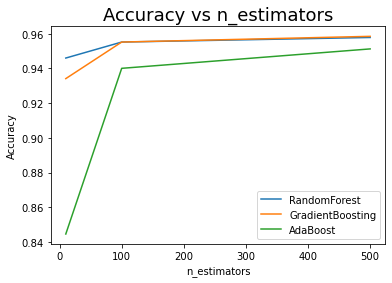

In [38]:
plt.plot(ne, RFacc_list, label = 'RandomForest')
plt.plot(ne, GBacc_list, label = 'GradientBoosting')
plt.plot(ne, ABacc_list, label = 'AdaBoost')
plt.title("Accuracy vs n_estimators", fontsize = 18)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

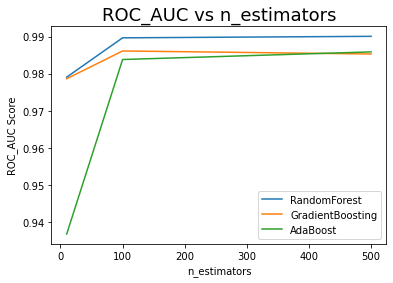

In [39]:
plt.plot(ne, RFroc_list, label = 'RandomForest')
plt.plot(ne, GBroc_list, label = 'GradientBoosting')
plt.plot(ne, ABroc_list, label = 'AdaBoost')
plt.title("ROC_AUC vs n_estimators", fontsize = 18)
plt.xlabel("n_estimators")
plt.ylabel("ROC_AUC Score")
plt.legend()
plt.show()